<a href="https://colab.research.google.com/github/seuha516/MachineLearningPractice/blob/main/Regression%26Regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **회귀 알고리즘**과 **모델 규제**

##KNeighborsRegressor

### *Data*

In [189]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

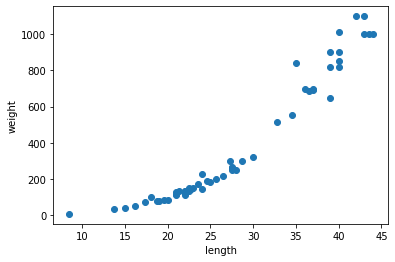

In [190]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### Train_Test_Split

In [191]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

In [192]:
#1차원 배열 -> 2차원 배열
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

### Training

In [193]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

0.9928094061010639


#### Check Error

In [194]:
from sklearn.metrics import mean_absolute_error
test_prediction=knr.predict(test_input)
mean_err=mean_absolute_error(test_target,test_prediction)
print(mean_err)

19.157142857142862


####Underfitting

In [195]:
#과소적합
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9698823289099255
0.9928094061010639


In [196]:
knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.974645996398761


###Problem Solve

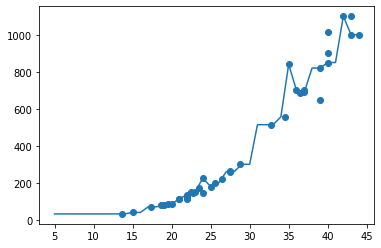

n_neighbors=1
score : 0.985283


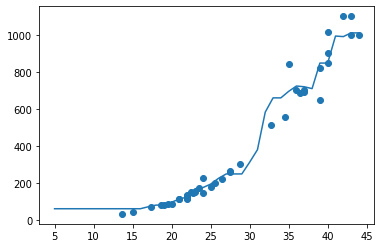

n_neighbors=5
score : 0.969882


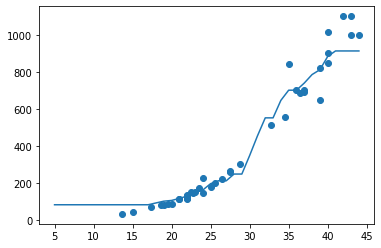

n_neighbors=10
score : 0.961646


In [197]:
knr=KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
  knr.n_neighbors=n
  knr.fit(train_input,train_target)
  prediction=knr.predict(x)
  
  plt.scatter(train_input,train_target)
  plt.plot(x,prediction)
  plt.show()
  print("n_neighbors=%d"%n)
  print("score : %f"%knr.score(train_input,train_target))

##Linear Regression

###Error Case

In [198]:
#실제 값보다 훨씬 작게 예측
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[1033.33333333]
[1033.33333333]


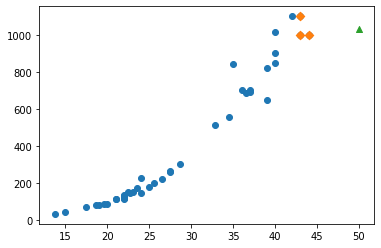

1033.3333333333333


In [199]:
distances,indexes=knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033.33,marker='^')
plt.show()
print(np.mean(train_target[indexes]))

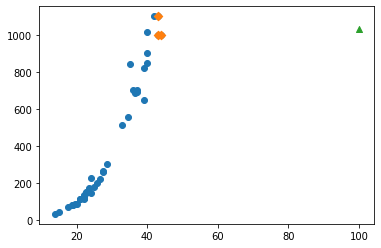

1033.3333333333333


In [200]:
distances,indexes=knr.kneighbors([[100]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033.33,marker='^')
plt.show()
print(np.mean(train_target[indexes]))

###LinearRegression

In [201]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


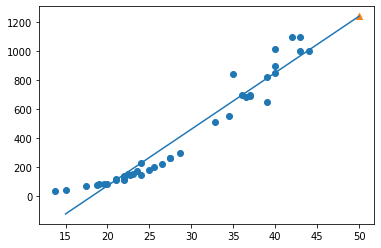

In [202]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.838,marker='^')
plt.show()

####Result

In [203]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976039
0.8247503123313558


###PolynominalRegression

In [204]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))
print(train_poly)
print(test_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]
[[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25  

In [205]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


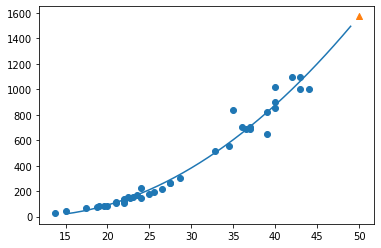

In [206]:
point=np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_)
plt.scatter(50,1573.98,marker='^')
plt.show()

####Result

In [207]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


##Multiple Regression

###Pandas

In [208]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

###PolynomialFeatures

In [209]:
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

In [210]:
#PolynomialFeatures 예제
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [211]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [212]:
test_poly=poly.transform(test_input)

###Training

In [213]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Result

In [214]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982124
0.9714559911594132


###Training (Degree=5)

In [215]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

(42, 55)


####Result

In [216]:
#과대적합
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9999999999991096
-144.40579242335605


##Regulation

###StandardScaler

In [217]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

###Ridge

In [218]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615398


####Find alpha

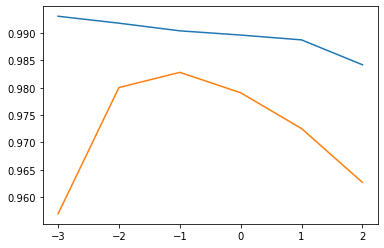

In [219]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [220]:
#alpha=0.1
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386927


###Lasso

In [221]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9897898972080961
0.9800593698421883


####Find alpha

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


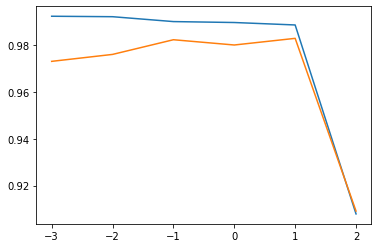

In [222]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  lasso=Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [223]:
#alpha=10
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


####Lasso.coef

In [224]:
print(np.sum(lasso.coef_==0))

40
